### Principal Component Analysis

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
mat_contents = sio.loadmat('mnistAll.mat')

#### Load data

In [2]:
train_img = mat_contents['mnist'][0][0][0]
train_label = mat_contents['mnist'][0][0][2]
idx3 = np.where(mat_contents['mnist'][0][0][2]==3)
ndx = idx3[0][:1000]; d = 28*28;
n = len(ndx)
X = np.double(train_img[:,:,ndx].reshape(d,n))

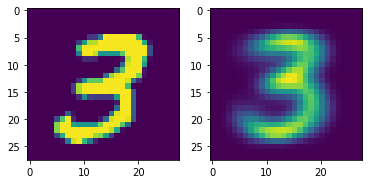

In [3]:
plt.subplot(1,2,1)
plt.imshow(X[:,0].reshape(28,28))
plt.subplot(1,2,2)
mu = np.mean(X,axis=1)
plt.imshow(mu.reshape(28,28))

#### processing

In [4]:
def pcaPmtk(x):
    n,d=x.shape
    K = np.linalg.matrix_rank(x)
    mu = np.mean(x,axis=1)
    xc = x-np.transpose(np.tile(mu,(d,1)))
    w,v = np.linalg.eigh(np.cov(xc))
    wsort = np.sort(w)[::-1]
    ind = np.argsort(w)[::-1]
    B = v[:,ind[:K]]
    z = np.matmul(np.transpose(xc),B)
    xrecon = np.matmul(z,np.transpose(B))+np.tile(mu,(d,1))
    return B,z,w

In [5]:
v,z,evals = pcaPmtk(X)

#### Principal Axis

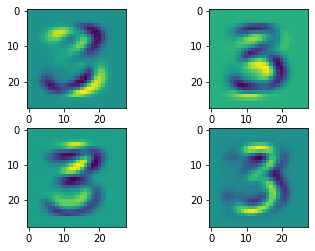

In [6]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(v[:,i].reshape(28,28))

#### Reconstructed Image

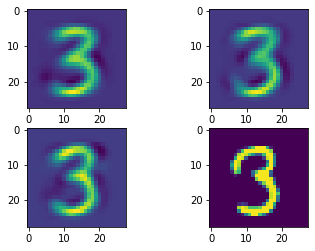

In [7]:
# number of principal axes
Ks = [5,10,20,np.linalg.matrix_rank(X)]
for j in range(4):
    xre = np.matmul(z[124,:Ks[j]],np.transpose(v[:,:Ks[j]]))+mu
    plt.subplot(2,2,j+1)
    plt.imshow(xre.reshape(28,28))

### Proof


#### Cost function
$$J(w,z_{i1})=\frac{1}{N}\sum^N_{i=1}(x_i-z_{i1}w_1)^\top(x_i-z_{i1}w_1)$$